In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
%matplotlib inline

Loading the data

In [2]:
dfRaw = pd.read_csv('data/amazon_prime_titles.csv')
dfRaw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


Algumas perguntas a serem respondidas
1. Qual tipo é mais comum?
2. Qual diretor possui a maior quantidade de trabalhos no catálogo?
4. Qual a duração média dos filmes, seriados, show, etc...
5. Como os filmes estão listados? comédia, drama, suspense, etc...
6. Quais atores trabalharam com mais frequência em projetos na Amazon?
7. Dos principais diretos qual é o rating de seus trabalhos?
8. Qual mês do ano possui a maior quantidade de conteúdo adicionado?
9. Agregar o tipo de conteúdo entre filmes e outros conteúdo por ano

In [3]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [4]:
dfRaw.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

### Qual tipo é mais comum?
Contando a quantidade da variável type podemos responder a essa pergunta facilmente

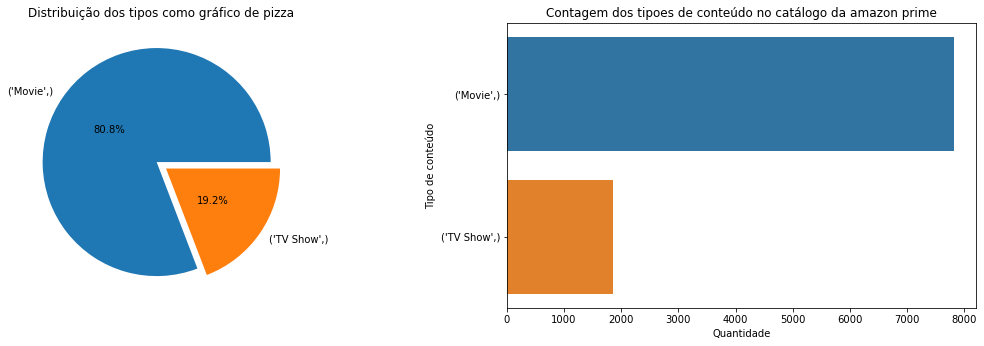

In [41]:
dfTypeCnt = dfRaw[['type']].value_counts()
dfTypeCnt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

ax[0].pie(dfTypeCnt.values,labels=dfTypeCnt.index.values,autopct="%.1f%%", explode=[0.05]*2, pctdistance=0.5);
ax[0].set_title("Distribuição dos tipos como gráfico de pizza")

sns.barplot(x = dfTypeCnt.values, y = dfTypeCnt.index.values, ax = ax[1])
ax[1].set_title("Contagem dos tipoes de conteúdo no catálogo da amazon prime")
ax[1].set_ylabel('Tipo de conteúdo')
ax[1].set_xlabel('Quantidade')



plt.tight_layout(pad=5)
plt.show()

### Qual diretor possui a maior quantidade de trabalhos no catálogo?

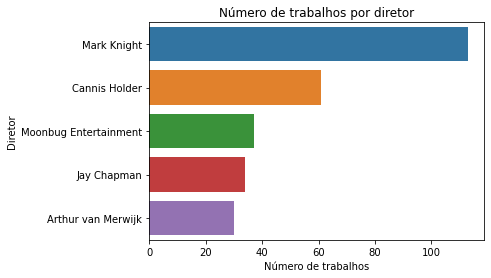

In [72]:
dfDirectorCnt = pd.DataFrame(dfRaw['director'].dropna().value_counts())
sns.barplot(x = dfDirectorCnt.head()['director'].values, y = dfDirectorCnt.head().index.values)
plt.xlabel('Número de trabalhos')
plt.ylabel('Diretor')
plt.title("Número de trabalhos por diretor");

### Qual é a duração média dos conteúdos?

In [116]:
dfAnalysis = dfRaw.copy()
dfAnalysis['DurationNum'] = dfAnalysis['duration'].map(lambda x: re.split(" ", x)[0]).astype(int)
dfAnalysis['DurationType'] = dfAnalysis['duration'].map(lambda x: re.split(" ", x)[1])
dfAnalysis['DurationType'].replace(to_replace='Season', value='Seasons', inplace=True)


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
DurationNum      int32
DurationType    object
dtype: object